In [45]:
import pandas as pd
import matplotlib.pyplot as plt

from db.service import con

***
## СВОДНАЯ ТАБЛИЦА

In [46]:
start_date = '2023-01-01'
end_date = '2023-09-16'


query = f"""
SELECT flat_id, flats.url, date, price
FROM prices
LEFT JOIN flats ON flats.id = prices.flat_id
WHERE date BETWEEN '{start_date}' AND '{end_date}'
"""

df = pd.read_sql_query(query, con)
pivot_df = df.pivot_table(index=['flat_id', 'url'], columns='date', values='price', aggfunc='first')
pivot_df.reset_index(inplace=True)
pivot_df.columns.name = None

pivot_df.head(3)


,flat_id,url,2023-07-02,2023-07-03,2023-07-06,2023-07-07,2023-07-08,2023-07-09,2023-07-10,2023-07-11,...,2023-08-30,2023-08-31,2023-09-01,2023-09-02,2023-09-03,2023-09-04,2023-09-05,2023-09-06,2023-09-07,2023-09-16
0,14670595,https://krisha.kz/a/show/14670595,NaN,NaN,250000.0,250000.0,250000.0,250000.0,250000.0,250000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15759539,https://krisha.kz/a/show/15759539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18846396,https://krisha.kz/a/show/18846396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***
## ДИНАМИКА ЦЕН НА КОНКРЕТНУЮ КВАРТИРУ

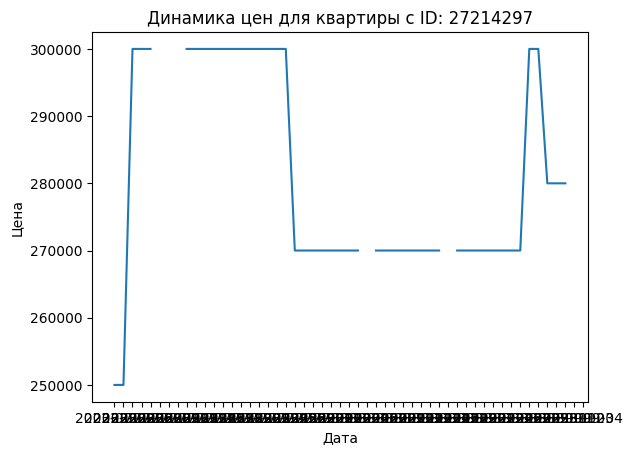

In [47]:
# Указать flat_id для интересующей квартиры.
flat_id = 27214297

flat_data = pivot_df[pivot_df['flat_id'] == flat_id]
dates = flat_data.columns[2:]
prices = flat_data.iloc[0, 2:]

# Создать график
plt.plot(dates, prices)

# Настройка осей и заголовка графика
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.title(f"Динамика цен для квартиры с ID: {flat_id}")

# Отображение графика
plt.show()

***
## ДИНАМИКА СРЕДНЕЙ ЦЕНЫ ДЛЯ ВСЕЙ ВЫБОРКИ

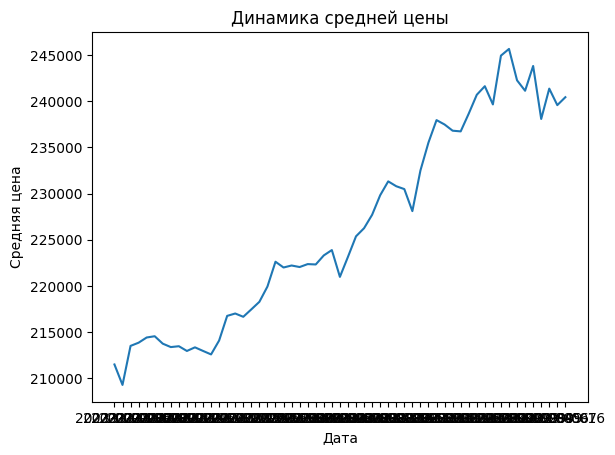

In [48]:
average_prices = pivot_df.drop(['flat_id', 'url'], axis=1).mean()

# Создать график
plt.plot(average_prices.index, average_prices.values)

# Настройка осей и заголовка графика
plt.xlabel('Дата')
plt.ylabel('Средняя цена')
plt.title('Динамика средней цены')

# Отобразить график
plt.show()

In [49]:
# TODO: Добавить кол-во квартир по цене. С разницей в день. Суточная динамика.
# TODO: График кол-ва квартир по цене и по дням.

# TODO: Кол-во. Новых квартир за сутки.
# TODO: Минус кол-во тех у которых цена стала NaN.